In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import healpy as hp
import time

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp
from ulmo.plotting import gallery as ulmo_gallery
from papers.LLC.SST_Compare.Analysis.py import sst_compare_utils as compare

In [2]:
v98 = compare.load_table('viirs')

Read main table: s3://viirs/Tables/VIIRS_all_98clear_std.parquet


In [3]:
llc = compare.load_table('llc_match')

Read main table: s3://llc/Tables/llc_viirs_match.parquet


In [4]:
v98['DT'] = v98.T90 - v98.T10
llc['DT'] = llc.T90 - llc.T10

# Explore high LL

In [5]:
from papers.LLC.SST_Compare.Figures.py import figs_llc_viirs as figs

In [6]:
evts_v98 = np.load('evts_v98', allow_pickle=True)
hp_lons_v98 = np.load('hp_lons_v98', allow_pickle=True)
hp_lats_v98 = np.load('hp_lats_v98', allow_pickle=True)
meds_v98 = np.load('meds_v98', allow_pickle=True)
evts_llc= np.load('evts_llc_match', allow_pickle=True)
hp_lons_llc= np.load('hp_lons_llc_match', allow_pickle=True)
hp_lats_llc= np.load('hp_lats_llc_match', allow_pickle=True)
meds_llc= np.load('meds_llc_match', allow_pickle=True)

In [43]:
lon_idx = np.where((hp_lons_v98 > 230) & (hp_lons_v98 <250))[0]
lon_idx

array([    9,    34,    53, ..., 49105, 49122, 49145])

In [47]:
lat_idx = np.where((hp_lats_v98 < 2) & (hp_lats_v98 >-2))[0]

In [48]:
both_idx = []
for idx in lat_idx:
    
    if idx in lon_idx:
        both_idx.append(idx)

In [49]:
pac_idx = np.asarray(both_idx)
pac_idx

array([23844, 23845, 23846, 23847, 23848, 23849, 23850, 23851, 23852,
       23853, 23854, 23855, 23856, 23857, 24100, 24101, 24102, 24103,
       24104, 24105, 24106, 24107, 24108, 24109, 24110, 24111, 24112,
       24113, 24356, 24357, 24358, 24359, 24360, 24361, 24362, 24363,
       24364, 24365, 24366, 24367, 24368, 24369, 24612, 24613, 24614,
       24615, 24616, 24617, 24618, 24619, 24620, 24621, 24622, 24623,
       24624, 24625, 24868, 24869, 24870, 24871, 24872, 24873, 24874,
       24875, 24876, 24877, 24878, 24879, 24880, 24881, 25124, 25125,
       25126, 25127, 25128, 25129, 25130, 25131, 25132, 25133, 25134,
       25135, 25136, 25137, 25380, 25381, 25382, 25383, 25384, 25385,
       25386, 25387, 25388, 25389, 25390, 25391, 25392, 25393])

In [51]:
count = 0
for i in pac_idx:
    count += evts_v98[i]

In [52]:
count

16550.0

In [60]:
evts_v98[24368]

194.0

In [61]:
evts_v98[24369]

197.0

In [66]:
evts_v98[24367]

195.0

In [62]:
hp_lons_v98[24368]

247.49999999999997

In [69]:
east = hp_lons_v98[24369]

In [70]:
west = hp_lons_v98[24367]

In [64]:
hp_lats_v98[24368]

0.5968418305070173

In [65]:
hp_lats_v98[24369]

0.5968418305070173

In [68]:
hp_lats_v98[24367]

0.5968418305070173

In [81]:
line = np.where((hp_lons_v98[pac_idx] > 246.5) & (hp_lons_v98[pac_idx] < 248.5))[0]

In [73]:
hp_lons_v98[pac_idx][12]

247.49999999999997

In [78]:
pac_idx[40]

24368

In [84]:
north = hp_lats_v98[pac_idx][line][2]
south = hp_lats_v98[pac_idx][line][4]

In [99]:
rect = (v98.lat > south ) & (v98.lat < north) & (v98.lon > -(360 - west )) & (v98.lon < -(360 - east) )
elem = v98[ rect ]

In [102]:
print('east: {}, west: {}, north: {}, south: {}'.format(360-east, 360-west, north, south))

east: 111.09374999999997, west: 113.90625000000009, north: 1.1937484371410676, south: 0.0


In [101]:
elem.shape

(746, 21)

In [ ]:
evts_head, hp_lons_head, hp_lats_head, meds_head = sp.evals_to_healpix_meds(eval_tbl=head, nside=64,  mask=True)

In [104]:
nside= 64

# Grab lats, lons
lats = viirs_p.lat.values
lons = viirs_p.lon.values

# Grab LL values
vals = viirs_p.LL.values

# Healpix coords
theta = (90 - lats) * np.pi / 180.  # convert into radians
phi = lons * np.pi / 180.
idx_all = hp.pixelfunc.ang2pix(nside, theta, phi) # returns the healpix pixel numbers that correspond to theta and phi values

In [115]:
where =  np.where(idx_all == 24368)[0]
elem = viirs_p.iloc[where]

In [120]:
elem_dict = elem.to_dict()


In [141]:
other_dict = elem.T.to_dict()

In [154]:
keyss = []
for key in other_dict.keys():
    keyss.append(key)
keysss = np.asarray(keys)
keysss

array([   6371,    6375,   61478,   67001,   88556,  220448,  220521,
        241581,  241583,  278804,  289844,  308756,  309859,  318636,
        353618,  385574,  412708,  428955,  437348,  437650,  437995,
        439434,  440246,  440249,  447419,  447420,  465605,  470116,
        493598,  497501,  517865,  517866,  530918,  569092,  610303,
        622406,  641397,  665442,  712134,  797974,  836276,  836277,
        861324,  862751,  870845,  870847,  871452,  874615,  927010,
        973914,  978670,  978671, 1093273, 1093274, 1158561, 1301088,
       1319640, 1325680, 1330050, 1343775, 1354410, 1371426, 1371856,
       1371857, 1374753, 1374754, 1375176, 1375465, 1375467, 1389779,
       1394996, 1397975, 1398824, 1398828, 1399317, 1399706, 1406382,
       1420932, 1426994, 1449705, 1454584, 1491070, 1491071, 1497710,
       1497712, 1498152, 1530693, 1530694, 1556273, 1556409, 1557260,
       1559118, 1562600, 1579877, 1579878, 1580706, 1591993, 1605175,
       1608295, 1638

In [127]:
import scipy.io

In [156]:
scipy.io.savemat('elem_24368.mat', elem_dict)
scipy.io.savemat('keys.mat', {'keys': keysss})

In [158]:
meds_llc[24368]

914.0157470703125

In [130]:
test = scipy.io.loadmat('elem_24368.mat')

In [131]:
test

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 19 15:26:42 2022',
 '__version__': '1.0',
 '__globals__': [],
 'filename': array([[None]], dtype=object),
 'row': array([[None]], dtype=object),
 'col': array([[None]], dtype=object),
 'lat': array([[None]], dtype=object),
 'lon': array([[None]], dtype=object),
 'clear_fraction': array([[None]], dtype=object),
 'field_size': array([[None]], dtype=object),
 'datetime': array([[None]], dtype=object),
 'ex_filename': array([[None]], dtype=object),
 'pp_file': array([[None]], dtype=object),
 'pp_root': array([[None]], dtype=object),
 'pp_idx': array([[None]], dtype=object),
 'pp_type': array([[None]], dtype=object),
 'mean_temperature': array([[None]], dtype=object),
 'Tmin': array([[None]], dtype=object),
 'Tmax': array([[None]], dtype=object),
 'T90': array([[None]], dtype=object),
 'T10': array([[None]], dtype=object),
 'LL': array([[None]], dtype=object),
 'MODIS_LL': array([[None]], dtype=object),
 'DT': array([

## Pacific

In [53]:
south=-2
north=2
mid_lon=120
dlon=10

In [54]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_p = v98[ rect ]

rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_p = llc[ rect ]

In [95]:
viirs_p.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,...,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,MODIS_LL,DT
561,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4176,2112,-0.049313,-110.743660,9.982639e-03,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,602156,0,24.212793,22.200012,25.940002,24.739990,23.809998,282.602539,318.068542,0.929993
562,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4176,2880,-0.988707,-116.901054,-1.654877e-15,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,328192,0,24.025719,23.230011,25.059998,24.410004,23.579987,733.963135,702.542480,0.830017
563,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4176,2976,-1.139776,-117.893950,-1.654877e-15,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,921055,0,24.463837,23.589996,25.450012,24.980011,24.040009,698.518188,687.882690,0.940002
564,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4272,2880,-0.372715,-117.039210,6.456163e-03,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,851911,0,23.881798,22.260010,25.260010,24.290009,23.500000,442.670044,447.958862,0.790009
565,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4272,2976,-0.525988,-118.031620,-6.884774e-16,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,322858,0,24.246431,23.450012,25.029999,24.609985,23.859985,655.726624,630.597168,0.750000


Text(0.5, 0.98, 'Pacific')

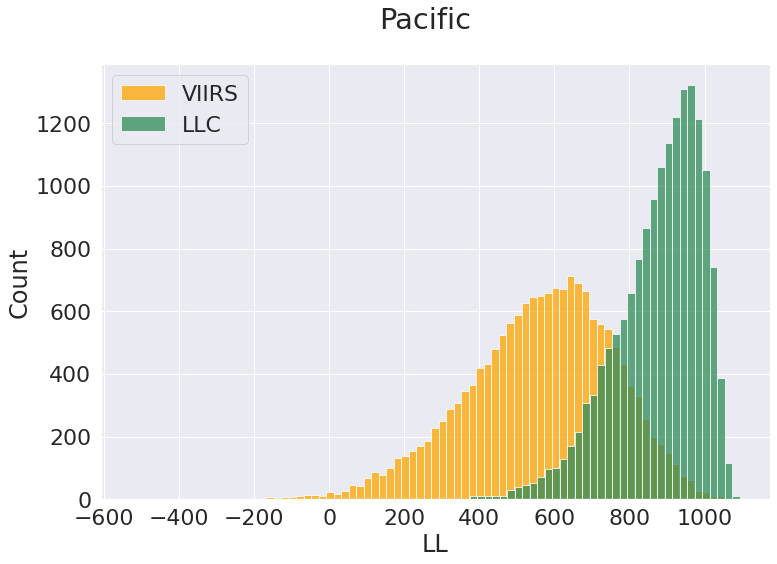

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_p, x = 'LL', binwidth= 20, color = 'orange', stat = 'count', label='VIIRS')
ax = sns.histplot( data = llc_p, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'count', label='LLC')
                  
ax.legend()
fig.suptitle('Pacific')

Median LL is 579.0887451171875.
Temperature scale is -1.1 to 1.1.


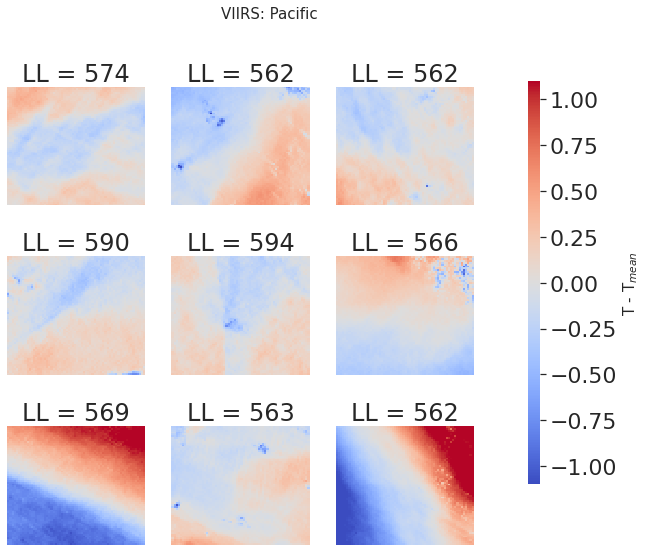

In [16]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=120, dlon=10, tmin=-1.1, tmax=1.1, title='VIIRS: Pacific')

Median LL is 579.0887451171875.
Temperature scale is -1.2368907928466797 to 0.7695102691650391.


/home/jovyan/ulmo/ulmo/plotting/gallery.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  return fig.tight_layout(rect=[0, 0, .9, 1])


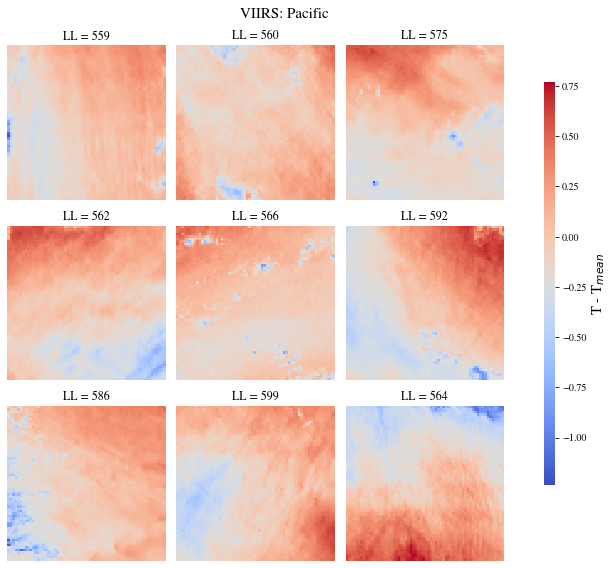

In [8]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=120, dlon=10, tmin=True, tmax=True, title='VIIRS: Pacific')

Median LL is 898.9618225097656.
Temperature scale is -1.1 to 1.1.


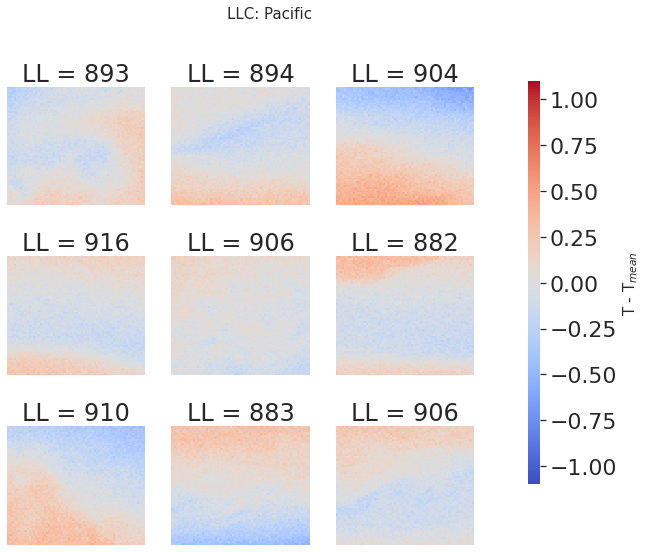

In [17]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=120, dlon=10, tmin=-1.1, tmax=1.1, title='LLC: Pacific')

Median LL is 898.9618225097656.
Temperature scale is -0.6239070892333984 to 0.5212078094482422.


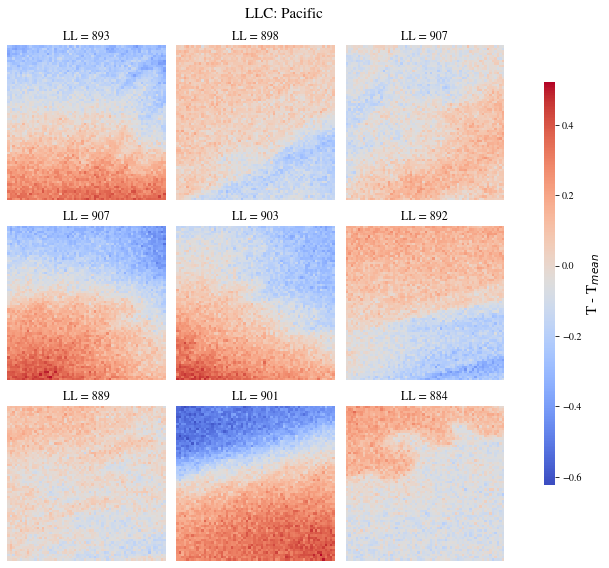

In [9]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=120, dlon=10, tmin=True, tmax=True, title='LLC: Pacific')

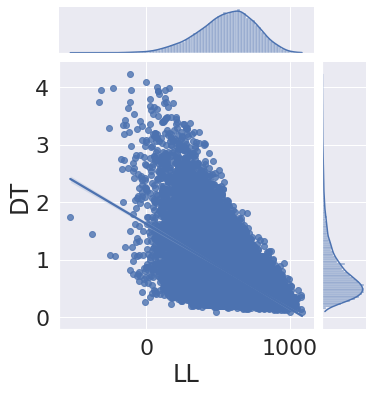

In [14]:
sns.set(font_scale = 2)

ax = sns.jointplot(x = viirs_p['LL'], y = viirs_p['DT'], kind = 'reg')

In [16]:
viirs_p.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,...,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,MODIS_LL,DT
561,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4176,2112,-0.049313,-110.743660,9.982639e-03,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,602156,0,24.212793,22.200012,25.940002,24.739990,23.809998,282.602539,318.068542,0.929993
562,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4176,2880,-0.988707,-116.901054,-1.654877e-15,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,328192,0,24.025719,23.230011,25.059998,24.410004,23.579987,733.963135,702.542480,0.830017
563,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4176,2976,-1.139776,-117.893950,-1.654877e-15,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,921055,0,24.463837,23.589996,25.450012,24.980011,24.040009,698.518188,687.882690,0.940002
564,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4272,2880,-0.372715,-117.039210,6.456163e-03,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,851911,0,23.881798,22.260010,25.260010,24.290009,23.500000,442.670044,447.958862,0.790009
565,s3://viirs/data/2012/032/20120201202000-OSPO-L...,4272,2976,-0.525988,-118.031620,-6.884774e-16,192,2012-02-01 20:20:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,322858,0,24.246431,23.450012,25.029999,24.609985,23.859985,655.726624,630.597168,0.750000


Text(0.5, 0.98, 'Pacific')

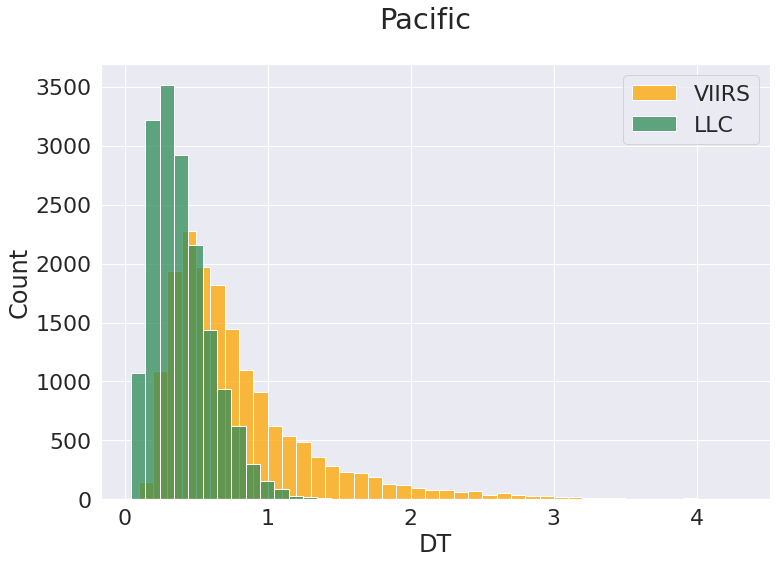

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_p, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'count', label='VIIRS')
ax = sns.histplot( data = llc_p, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'count', label='LLC')
                  
ax.legend()
fig.suptitle('Pacific')

Temperature scale is -0.9791469573974609 to 1.1619739532470703.


/tmp/ipykernel_11590/1112475173.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


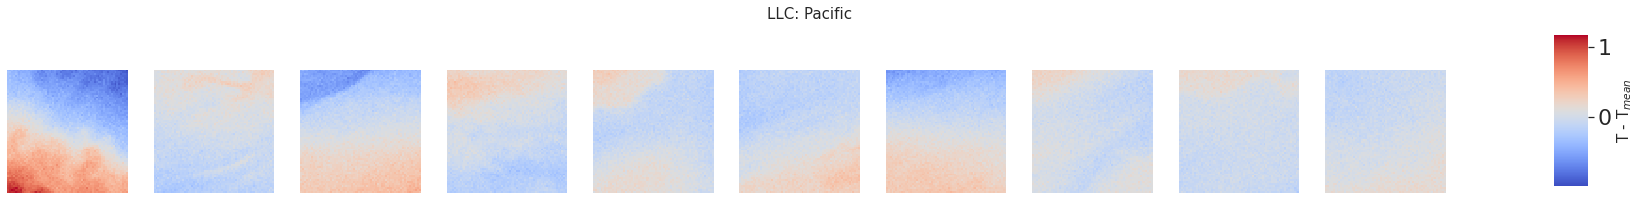

In [50]:
tmin=True
tmax=True
title=True
# region
lrect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
ltbl = llc[ lrect ]

#vrect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
#vtbl = v98[ vrect ]

# divvy up cutouts into percentiles
l10, l20, l30, l40, l50, l60, l70, l80, l90, l100 = np.percentile(ltbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#v10, v20, v30, v40, v50, v60, v70, v80, v90, v100 = np.percentile(vtbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

lr10  = ltbl[ (ltbl.LL < l10 ) ]
lr20  = ltbl[ (ltbl.LL > l10 ) & (ltbl.LL < l20) ]
lr30  = ltbl[ (ltbl.LL > l20 ) & (ltbl.LL < l30) ]
lr40  = ltbl[ (ltbl.LL > l30 ) & (ltbl.LL < l40) ]
lr50  = ltbl[ (ltbl.LL > l40 ) & (ltbl.LL < l50) ]
lr60  = ltbl[ (ltbl.LL > l50 ) & (ltbl.LL < l60) ]
lr70  = ltbl[ (ltbl.LL > l60 ) & (ltbl.LL < l70) ]
lr80  = ltbl[ (ltbl.LL > l70 ) & (ltbl.LL < l80) ]
lr90  = ltbl[ (ltbl.LL > l80 ) & (ltbl.LL < l90) ]
lr100 = ltbl[ (ltbl.LL > l90 ) & (ltbl.LL < l100) ]

llc_rs = [lr10, lr20, lr30, lr40, lr50, lr60, lr70, lr80, lr90, lr100]

#vr10  = vtbl[ (vtbl.LL < v10 ) ]
#vr20  = vtbl[ (vtbl.LL > v10 ) & (vtbl.LL < v20) ]
#vr30  = vtbl[ (vtbl.LL > v20 ) & (vtbl.LL < v30) ]
#vr40  = vtbl[ (vtbl.LL > v30 ) & (vtbl.LL < v40) ]
#vr50  = vtbl[ (vtbl.LL > v40 ) & (vtbl.LL < v50) ]
#vr60  = vtbl[ (vtbl.LL > v50 ) & (vtbl.LL < v60) ]
#vr70  = vtbl[ (vtbl.LL > v60 ) & (vtbl.LL < v70) ]
#vr80  = vtbl[ (vtbl.LL > v70 ) & (vtbl.LL < v80) ]
#vr90  = vtbl[ (vtbl.LL > v80 ) & (vtbl.LL < v90) ]
#vr100 = vtbl[ (vtbl.LL > v90 ) & (vtbl.LL < v100) ]

#v98_rs = [vr10, vr20, vr30, vr40, vr50, vr60, vr70, vr80, vr90, vr100]

# pick 1 cutout from each percentile region
limgs = []
#vimgs = []

for reg in llc_rs: 
    img = np.random.choice( reg.index.to_numpy(), size = 1)
    limgs.append(img[0])
    
#for reg in v98_rs:
#    img = np.random.choice( reg.index.to_numpy(), size = 1)
#    vimgs.append(img[0])
    
#create figure

fig, axes = plt.subplots(1, 10, figsize = (23,3) )

fig.suptitle( 'LLC: Pacific', fontsize=15)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_kws={"orientation": "vertical", "shrink":1, "aspect":40, "label": "T - T$_{mean}$"}
pal, cm = plotting.load_palette()

#determine tmax and tmin
imgs = np.empty((64,64,10))
LLs  = np.empty(10)

for i in range(0,10):
    lidx = limgs[ i ]
    #vidx = vimgs[ i ]
    
    lcutout = llc.iloc[ lidx ] 
    #vcutout = v98.iloc[ vidx ] 
    
    limg= llc_io.grab_image(lcutout)
    #vimg= llc_io.grab_image(vcutout)
    
    imgs[:,:,i] = limg
    #imgs[:,:,10 + i] = limg
    LLs[i] = lcutout.LL
    #LLs[10 + i] = lcutout.LL

if tmax==True: 
    tmax = np.max(imgs)

if tmin==True:
    tmin = np.min(imgs)
print('Temperature scale is {} to {}.'.format(tmin, tmax))

# plot

for i, ax in enumerate(axes.flat):
    img = imgs[:,:,i]
    sns.heatmap(ax=ax, data=img, xticklabels=[], yticklabels=[], cmap='coolwarm',
            cbar=i == 0,
            vmin=tmin, vmax=tmax,
            cbar_ax=None if i else cbar_ax,
            cbar_kws=None if i else cbar_kws)
    #ax.set_title('LL = {}'.format(round(LLs[i])))
    ax.figure.axes[-1].yaxis.label.set_size(15)

fig.tight_layout(rect=[0, 0, .9, 1])

Temperature scale is -1.5093574523925781 to 1.2933521270751953.


/tmp/ipykernel_11590/2041350399.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


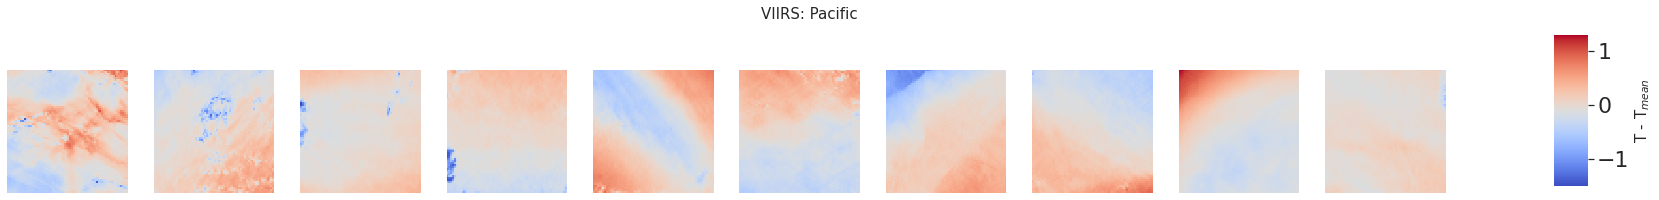

In [51]:
tmin=True
tmax=True
title=True
# region
#lrect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
#ltbl = llc[ lrect ]

vrect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
vtbl = v98[ vrect ]

# divvy up cutouts into percentiles
#l10, l20, l30, l40, l50, l60, l70, l80, l90, l100 = np.percentile(ltbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
v10, v20, v30, v40, v50, v60, v70, v80, v90, v100 = np.percentile(vtbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

#lr10  = ltbl[ (ltbl.LL < l10 ) ]
#lr20  = ltbl[ (ltbl.LL > l10 ) & (ltbl.LL < l20) ]
#lr30  = ltbl[ (ltbl.LL > l20 ) & (ltbl.LL < l30) ]
#lr40  = ltbl[ (ltbl.LL > l30 ) & (ltbl.LL < l40) ]
#lr50  = ltbl[ (ltbl.LL > l40 ) & (ltbl.LL < l50) ]
#lr60  = ltbl[ (ltbl.LL > l50 ) & (ltbl.LL < l60) ]
#lr70  = ltbl[ (ltbl.LL > l60 ) & (ltbl.LL < l70) ]
#lr80  = ltbl[ (ltbl.LL > l70 ) & (ltbl.LL < l80) ]
#lr90  = ltbl[ (ltbl.LL > l80 ) & (ltbl.LL < l90) ]
#lr100 = ltbl[ (ltbl.LL > l90 ) & (ltbl.LL < l100) ]

#llc_rs = [lr10, lr20, lr30, lr40, lr50, lr60, lr70, lr80, lr90, lr100]

vr10  = vtbl[ (vtbl.LL < v10 ) ]
vr20  = vtbl[ (vtbl.LL > v10 ) & (vtbl.LL < v20) ]
vr30  = vtbl[ (vtbl.LL > v20 ) & (vtbl.LL < v30) ]
vr40  = vtbl[ (vtbl.LL > v30 ) & (vtbl.LL < v40) ]
vr50  = vtbl[ (vtbl.LL > v40 ) & (vtbl.LL < v50) ]
vr60  = vtbl[ (vtbl.LL > v50 ) & (vtbl.LL < v60) ]
vr70  = vtbl[ (vtbl.LL > v60 ) & (vtbl.LL < v70) ]
vr80  = vtbl[ (vtbl.LL > v70 ) & (vtbl.LL < v80) ]
vr90  = vtbl[ (vtbl.LL > v80 ) & (vtbl.LL < v90) ]
vr100 = vtbl[ (vtbl.LL > v90 ) & (vtbl.LL < v100) ]

v98_rs = [vr10, vr20, vr30, vr40, vr50, vr60, vr70, vr80, vr90, vr100]

# pick 1 cutout from each percentile region
#limgs = []
vimgs = []

#for reg in llc_rs: 
#    img = np.random.choice( reg.index.to_numpy(), size = 1)
#    limgs.append(img[0])
    
for reg in v98_rs:
    img = np.random.choice( reg.index.to_numpy(), size = 1)
    vimgs.append(img[0])
    
#create figure

fig, axes = plt.subplots(1, 10, figsize = (23,3) )

fig.suptitle( 'VIIRS: Pacific', fontsize=15)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_kws={"orientation": "vertical", "shrink":1, "aspect":40, "label": "T - T$_{mean}$"}
pal, cm = plotting.load_palette()

#determine tmax and tmin
imgs = np.empty((64,64,10))
LLs  = np.empty(10)

for i in range(0,10):
    #lidx = limgs[ i ]
    vidx = vimgs[ i ]
    
    #lcutout = llc.iloc[ lidx ] 
    vcutout = v98.iloc[ vidx ] 
    
    #limg= llc_io.grab_image(lcutout)
    vimg= llc_io.grab_image(vcutout)
    
    imgs[:,:,i] = vimg
    #imgs[:,:,10 + i] = limg
    LLs[i] = vcutout.LL
    #LLs[10 + i] = lcutout.LL

if tmax==True: 
    tmax = np.max(imgs)

if tmin==True:
    tmin = np.min(imgs)
print('Temperature scale is {} to {}.'.format(tmin, tmax))

# plot

for i, ax in enumerate(axes.flat):
    img = imgs[:,:,i]
    sns.heatmap(ax=ax, data=img, xticklabels=[], yticklabels=[], cmap='coolwarm',
            cbar=i == 0,
            vmin=tmin, vmax=tmax,
            cbar_ax=None if i else cbar_ax,
            cbar_kws=None if i else cbar_kws)
    #ax.set_title('LL = {}'.format(round(LLs[i])))
    ax.figure.axes[-1].yaxis.label.set_size(15)

fig.tight_layout(rect=[0, 0, .9, 1])

In [25]:
tbl = v98
dLL=20
a = 3
b = 3

rect = (tbl.lat > south ) & (tbl.lat < north) & (np.abs(tbl.lon + mid_lon) < dlon)
tbl1 = tbl[ rect ]

#calculate median LL
med_LL = np.median(tbl1.LL.to_numpy())
print('Median LL is {}.'.format(med_LL))

#restrict dataframe

med = np.abs( tbl1.LL - med_LL) < dLL
tbl2 = tbl1[ med ]

#pick random dim1 x dim2 imgs
c = a*b
list = np.random.choice( tbl2.index.to_numpy(), size = c)

Median LL is 579.0887451171875.


In [26]:
list

array([2674375, 1996491, 2752076, 1353860, 1878266,  448432, 1857150,
       1295991,  608108])

In [28]:
file = v98.iloc[2674375].pp_file
idx = v98.iloc[2674375].pp_idx

with h5py.File(file, 'r') as pp_hf:
    
    img = pp_hf['valid'][idx, 0, ...]
    g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)

plt.show()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 's3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Atlantic

In [45]:
south=-2
north=2
mid_lon=10
dlon=10

In [20]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_a = v98[ rect ]

rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_a = llc[ rect ]

Text(0.5, 0.98, 'Atlantic')

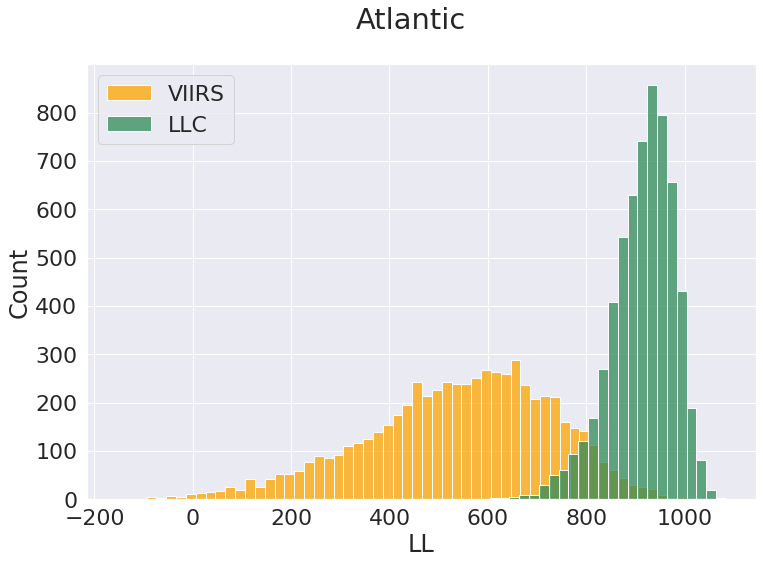

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_a, x = 'LL', binwidth= 20, color = 'orange', stat = 'count', label='VIIRS')
ax = sns.histplot( data = llc_a, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'count', label='LLC')
                  
ax.legend()
fig.suptitle('Atlantic')

Median LL is 561.718017578125.
Temperature scale is -1.1 to 1.1.


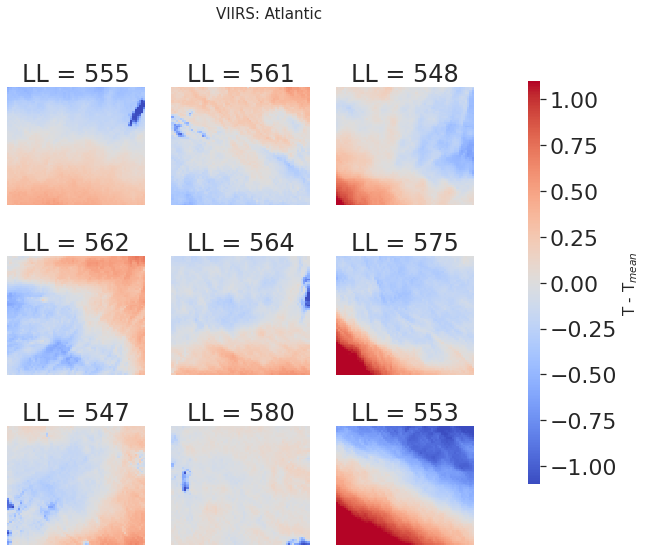

In [18]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=10, dlon=10, tmin=-1.1, tmax=1.1, title='VIIRS: Atlantic')

Median LL is 561.718017578125.
Temperature scale is -1.4415035247802734 to 1.6317939758300781.


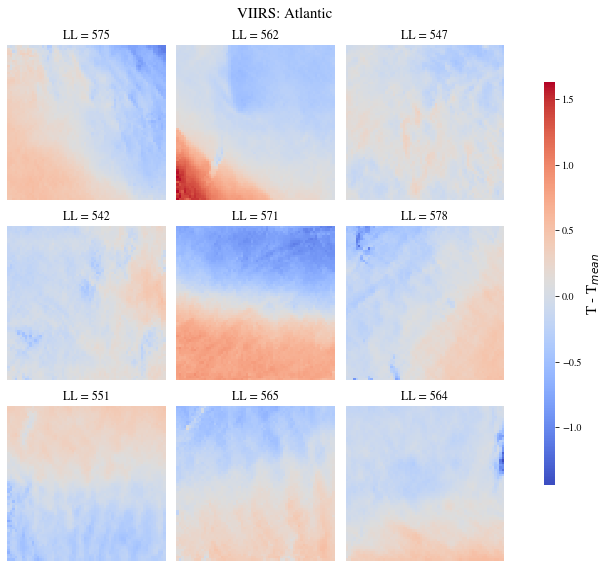

In [10]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=10, dlon=10, tmin=True, tmax=True, title='VIIRS: Atlantic')

Median LL is 922.7700500488281.
Temperature scale is -1.1 to 1.1.


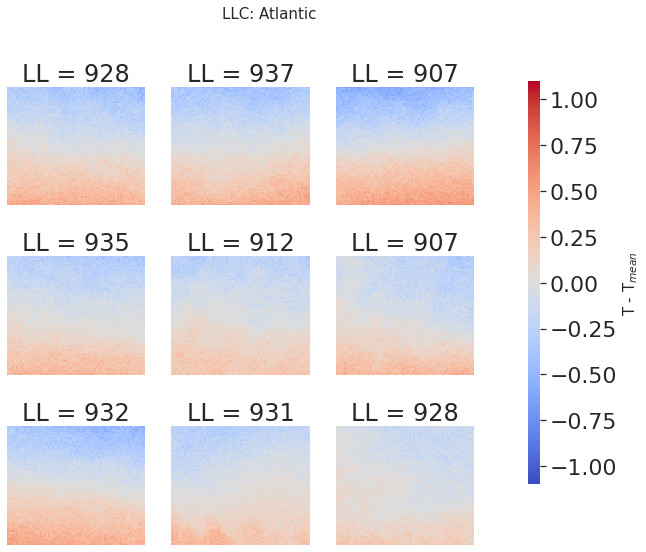

In [19]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=10, dlon=10, tmin=-1.1, tmax=1.1, title='LLC: Atlantic')

Median LL is 922.7700500488281.
Temperature scale is -0.7437782287597656 to 0.636993408203125.


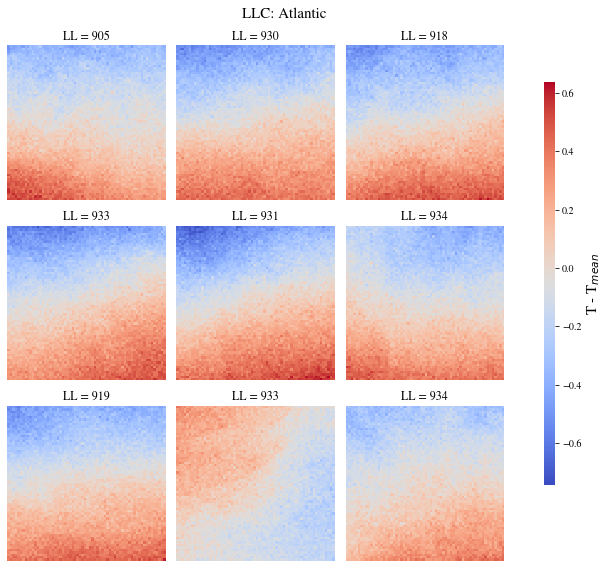

In [11]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=10, dlon=10, tmin=True, tmax=True, title='LLC: Atlantic')

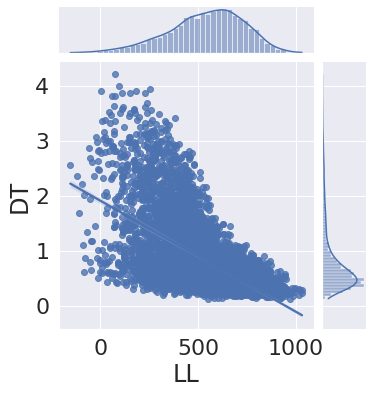

In [24]:
sns.set(font_scale = 2)

ax = sns.jointplot(x = viirs_a['LL'], y = viirs_a['DT'], kind = 'reg')

Text(0.5, 0.98, 'Atlantic')

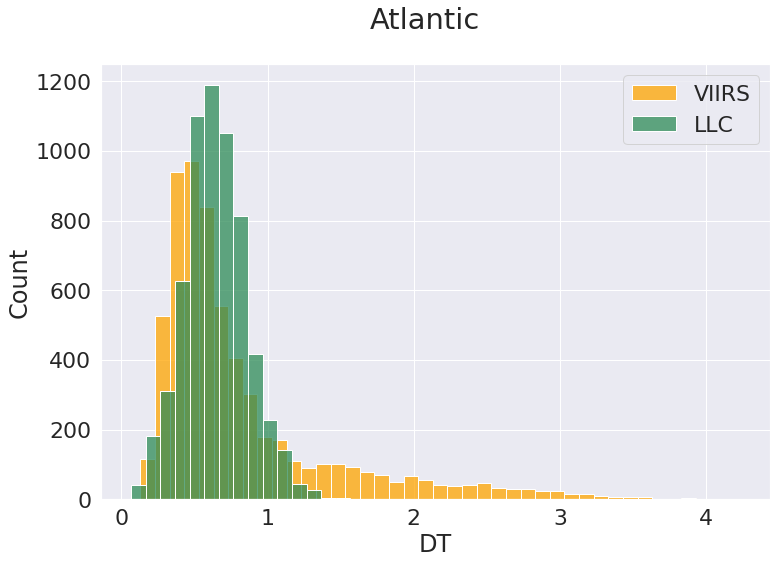

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_a, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'count', label='VIIRS')
ax = sns.histplot( data = llc_a, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'count', label='LLC')
                  
ax.legend()
fig.suptitle('Atlantic')

Temperature scale is -0.6309795379638672 to 0.6652641296386719.


/tmp/ipykernel_11590/1329719553.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


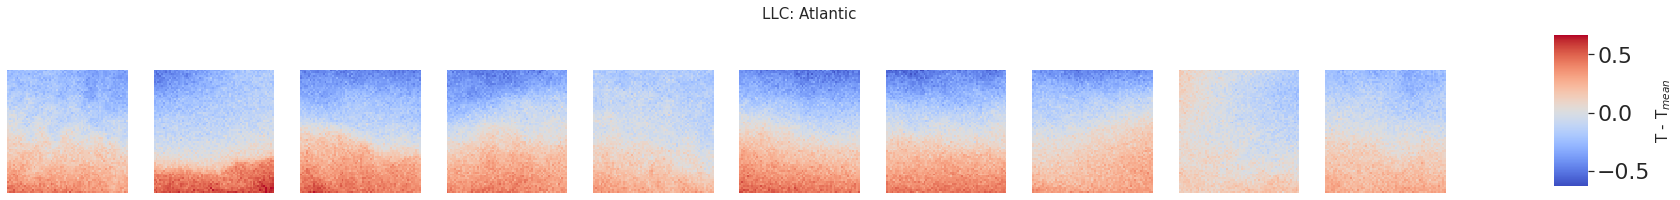

In [46]:
tmin=True
tmax=True
title=True
# region
lrect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
ltbl = llc[ lrect ]

#vrect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
#vtbl = v98[ vrect ]

# divvy up cutouts into percentiles
l10, l20, l30, l40, l50, l60, l70, l80, l90, l100 = np.percentile(ltbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#v10, v20, v30, v40, v50, v60, v70, v80, v90, v100 = np.percentile(vtbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

lr10  = ltbl[ (ltbl.LL < l10 ) ]
lr20  = ltbl[ (ltbl.LL > l10 ) & (ltbl.LL < l20) ]
lr30  = ltbl[ (ltbl.LL > l20 ) & (ltbl.LL < l30) ]
lr40  = ltbl[ (ltbl.LL > l30 ) & (ltbl.LL < l40) ]
lr50  = ltbl[ (ltbl.LL > l40 ) & (ltbl.LL < l50) ]
lr60  = ltbl[ (ltbl.LL > l50 ) & (ltbl.LL < l60) ]
lr70  = ltbl[ (ltbl.LL > l60 ) & (ltbl.LL < l70) ]
lr80  = ltbl[ (ltbl.LL > l70 ) & (ltbl.LL < l80) ]
lr90  = ltbl[ (ltbl.LL > l80 ) & (ltbl.LL < l90) ]
lr100 = ltbl[ (ltbl.LL > l90 ) & (ltbl.LL < l100) ]

llc_rs = [lr10, lr20, lr30, lr40, lr50, lr60, lr70, lr80, lr90, lr100]

#vr10  = vtbl[ (vtbl.LL < v10 ) ]
#vr20  = vtbl[ (vtbl.LL > v10 ) & (vtbl.LL < v20) ]
#vr30  = vtbl[ (vtbl.LL > v20 ) & (vtbl.LL < v30) ]
#vr40  = vtbl[ (vtbl.LL > v30 ) & (vtbl.LL < v40) ]
#vr50  = vtbl[ (vtbl.LL > v40 ) & (vtbl.LL < v50) ]
#vr60  = vtbl[ (vtbl.LL > v50 ) & (vtbl.LL < v60) ]
#vr70  = vtbl[ (vtbl.LL > v60 ) & (vtbl.LL < v70) ]
#vr80  = vtbl[ (vtbl.LL > v70 ) & (vtbl.LL < v80) ]
#vr90  = vtbl[ (vtbl.LL > v80 ) & (vtbl.LL < v90) ]
#vr100 = vtbl[ (vtbl.LL > v90 ) & (vtbl.LL < v100) ]

#v98_rs = [vr10, vr20, vr30, vr40, vr50, vr60, vr70, vr80, vr90, vr100]

# pick 1 cutout from each percentile region
limgs = []
#vimgs = []

for reg in llc_rs: 
    img = np.random.choice( reg.index.to_numpy(), size = 1)
    limgs.append(img[0])
    
#for reg in v98_rs:
#    img = np.random.choice( reg.index.to_numpy(), size = 1)
#    vimgs.append(img[0])
    
#create figure

fig, axes = plt.subplots(1, 10, figsize = (23,3) )

fig.suptitle( 'LLC: Atlantic', fontsize=15)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_kws={"orientation": "vertical", "shrink":1, "aspect":40, "label": "T - T$_{mean}$"}
pal, cm = plotting.load_palette()

#determine tmax and tmin
imgs = np.empty((64,64,10))
LLs  = np.empty(10)

for i in range(0,10):
    lidx = limgs[ i ]
    #vidx = vimgs[ i ]
    
    lcutout = llc.iloc[ lidx ] 
    #vcutout = v98.iloc[ vidx ] 
    
    limg= llc_io.grab_image(lcutout)
    #vimg= llc_io.grab_image(vcutout)
    
    imgs[:,:,i] = limg
    #imgs[:,:,10 + i] = limg
    LLs[i] = lcutout.LL
    #LLs[10 + i] = lcutout.LL

if tmax==True: 
    tmax = np.max(imgs)

if tmin==True:
    tmin = np.min(imgs)
print('Temperature scale is {} to {}.'.format(tmin, tmax))

# plot

for i, ax in enumerate(axes.flat):
    img = imgs[:,:,i]
    sns.heatmap(ax=ax, data=img, xticklabels=[], yticklabels=[], cmap='coolwarm',
            cbar=i == 0,
            vmin=tmin, vmax=tmax,
            cbar_ax=None if i else cbar_ax,
            cbar_kws=None if i else cbar_kws)
    #ax.set_title('LL = {}'.format(round(LLs[i])))
    ax.figure.axes[-1].yaxis.label.set_size(15)

fig.tight_layout(rect=[0, 0, .9, 1])

Temperature scale is -1.1287364959716797 to 2.011241912841797.


/tmp/ipykernel_11590/1091415942.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


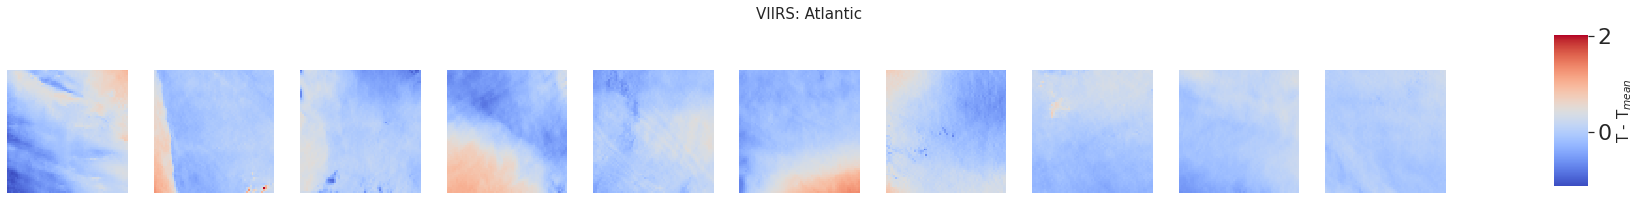

In [47]:
tmin=True
tmax=True
title=True
# region
#lrect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
#ltbl = llc[ lrect ]

vrect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
vtbl = v98[ vrect ]

# divvy up cutouts into percentiles
#l10, l20, l30, l40, l50, l60, l70, l80, l90, l100 = np.percentile(ltbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
v10, v20, v30, v40, v50, v60, v70, v80, v90, v100 = np.percentile(vtbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

#lr10  = ltbl[ (ltbl.LL < l10 ) ]
#lr20  = ltbl[ (ltbl.LL > l10 ) & (ltbl.LL < l20) ]
#lr30  = ltbl[ (ltbl.LL > l20 ) & (ltbl.LL < l30) ]
#lr40  = ltbl[ (ltbl.LL > l30 ) & (ltbl.LL < l40) ]
#lr50  = ltbl[ (ltbl.LL > l40 ) & (ltbl.LL < l50) ]
#lr60  = ltbl[ (ltbl.LL > l50 ) & (ltbl.LL < l60) ]
#lr70  = ltbl[ (ltbl.LL > l60 ) & (ltbl.LL < l70) ]
#lr80  = ltbl[ (ltbl.LL > l70 ) & (ltbl.LL < l80) ]
#lr90  = ltbl[ (ltbl.LL > l80 ) & (ltbl.LL < l90) ]
#lr100 = ltbl[ (ltbl.LL > l90 ) & (ltbl.LL < l100) ]

#llc_rs = [lr10, lr20, lr30, lr40, lr50, lr60, lr70, lr80, lr90, lr100]

vr10  = vtbl[ (vtbl.LL < v10 ) ]
vr20  = vtbl[ (vtbl.LL > v10 ) & (vtbl.LL < v20) ]
vr30  = vtbl[ (vtbl.LL > v20 ) & (vtbl.LL < v30) ]
vr40  = vtbl[ (vtbl.LL > v30 ) & (vtbl.LL < v40) ]
vr50  = vtbl[ (vtbl.LL > v40 ) & (vtbl.LL < v50) ]
vr60  = vtbl[ (vtbl.LL > v50 ) & (vtbl.LL < v60) ]
vr70  = vtbl[ (vtbl.LL > v60 ) & (vtbl.LL < v70) ]
vr80  = vtbl[ (vtbl.LL > v70 ) & (vtbl.LL < v80) ]
vr90  = vtbl[ (vtbl.LL > v80 ) & (vtbl.LL < v90) ]
vr100 = vtbl[ (vtbl.LL > v90 ) & (vtbl.LL < v100) ]

v98_rs = [vr10, vr20, vr30, vr40, vr50, vr60, vr70, vr80, vr90, vr100]

# pick 1 cutout from each percentile region
#limgs = []
vimgs = []

#for reg in llc_rs: 
#    img = np.random.choice( reg.index.to_numpy(), size = 1)
#    limgs.append(img[0])
    
for reg in v98_rs:
    img = np.random.choice( reg.index.to_numpy(), size = 1)
    vimgs.append(img[0])
    
#create figure

fig, axes = plt.subplots(1, 10, figsize = (23,3) )

fig.suptitle( 'VIIRS: Atlantic', fontsize=15)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_kws={"orientation": "vertical", "shrink":1, "aspect":40, "label": "T - T$_{mean}$"}
pal, cm = plotting.load_palette()

#determine tmax and tmin
imgs = np.empty((64,64,10))
LLs  = np.empty(10)

for i in range(0,10):
    #lidx = limgs[ i ]
    vidx = vimgs[ i ]
    
    #lcutout = llc.iloc[ lidx ] 
    vcutout = v98.iloc[ vidx ] 
    
    #limg= llc_io.grab_image(lcutout)
    vimg= llc_io.grab_image(vcutout)
    
    imgs[:,:,i] = vimg
    #imgs[:,:,10 + i] = limg
    LLs[i] = vcutout.LL
    #LLs[10 + i] = lcutout.LL

if tmax==True: 
    tmax = np.max(imgs)

if tmin==True:
    tmin = np.min(imgs)
print('Temperature scale is {} to {}.'.format(tmin, tmax))

# plot

for i, ax in enumerate(axes.flat):
    img = imgs[:,:,i]
    sns.heatmap(ax=ax, data=img, xticklabels=[], yticklabels=[], cmap='coolwarm',
            cbar=i == 0,
            vmin=tmin, vmax=tmax,
            cbar_ax=None if i else cbar_ax,
            cbar_kws=None if i else cbar_kws)
    #ax.set_title('LL = {}'.format(round(LLs[i])))
    ax.figure.axes[-1].yaxis.label.set_size(15)

fig.tight_layout(rect=[0, 0, .9, 1])

## Indian

In [39]:
south=-2
north=2
mid_lon=-50
dlon=10

In [27]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_i = v98[ rect ]

rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_i = llc[ rect ]

Text(0.5, 0.98, 'Indian')

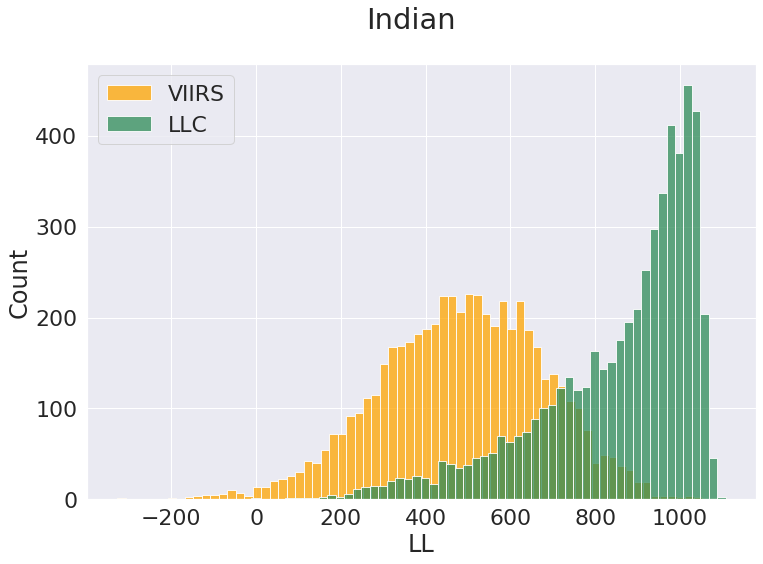

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_i, x = 'LL', binwidth= 20, color = 'orange', stat = 'count', label='VIIRS')
ax = sns.histplot( data = llc_i, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'count', label='LLC')
                  
ax.legend()
fig.suptitle('Indian')

Median LL is 493.8468017578125.
Temperature scale is -1.1 to 1.1.


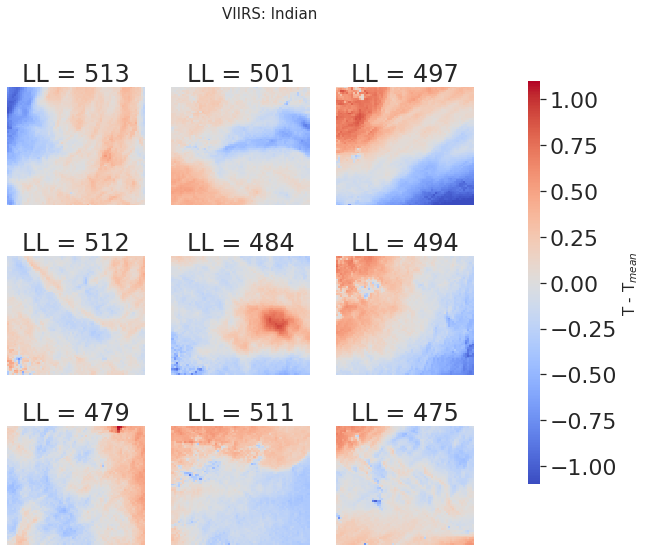

In [20]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=-50, dlon=10, tmin=-1.1, tmax=1.1, title='VIIRS: Indian')

Median LL is 493.8468017578125.
Temperature scale is -1.1822032928466797 to 0.8620433807373047.


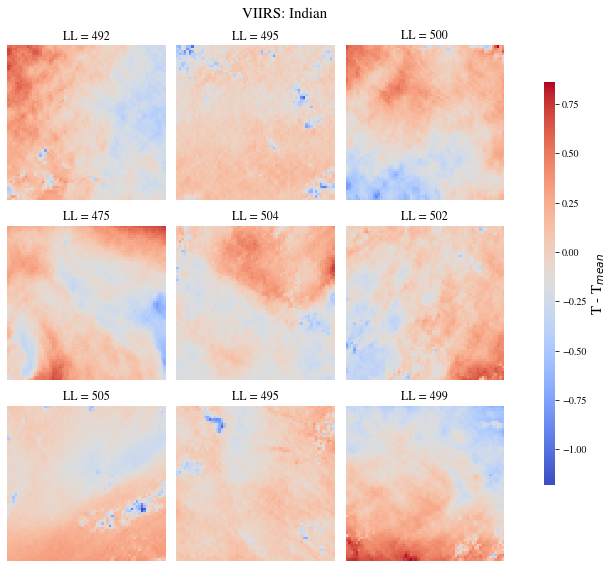

In [12]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=-50, dlon=10, tmin=True, tmax=True, title='VIIRS: Indian')

Median LL is 917.0349731445312.
Temperature scale is -1.1 to 1.1.


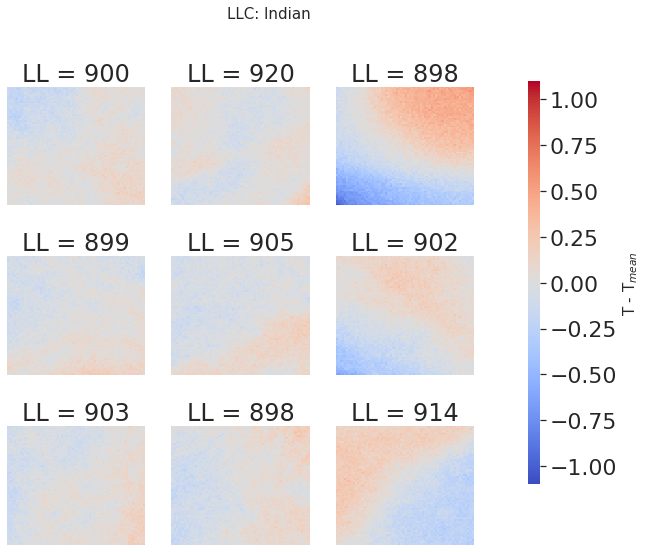

In [21]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=-50, dlon=10, tmin=-1.1, tmax=1.1, title='LLC: Indian')

Median LL is 917.0349731445312.
Temperature scale is -0.5243930816650391 to 0.6221809387207031.


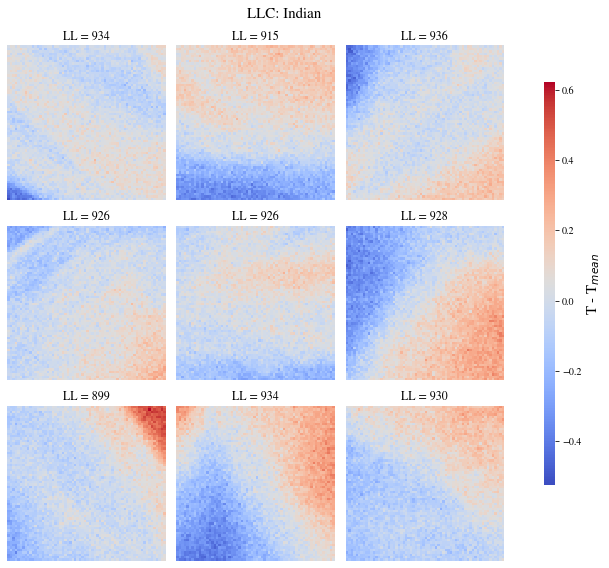

In [13]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-2, north=2, mid_lon=-50, dlon=10, tmin=True, tmax=True, title='LLC: Indian')

Text(0.5, 0.98, 'Indian')

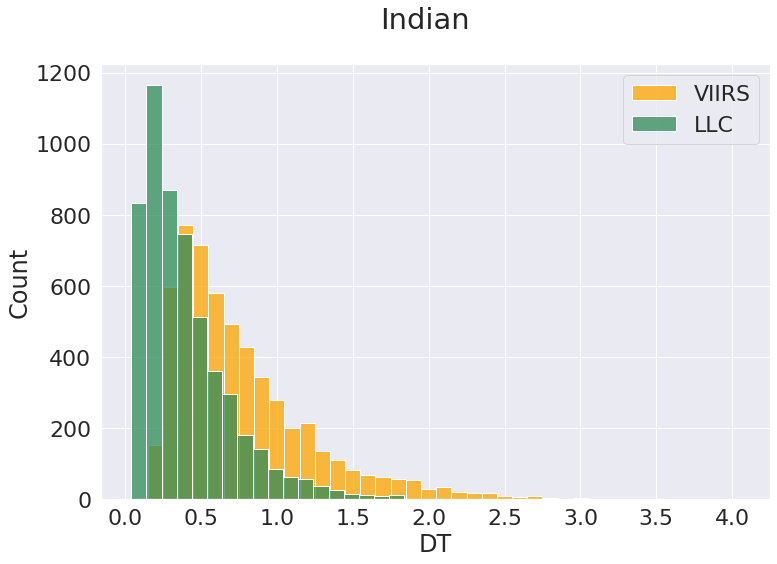

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_i, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'count', label='VIIRS')
ax = sns.histplot( data = llc_i, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'count', label='LLC')
                  
ax.legend()
fig.suptitle('Indian')

Temperature scale is -1.0262985229492188 to 0.8621444702148438.


/tmp/ipykernel_11590/4216659317.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


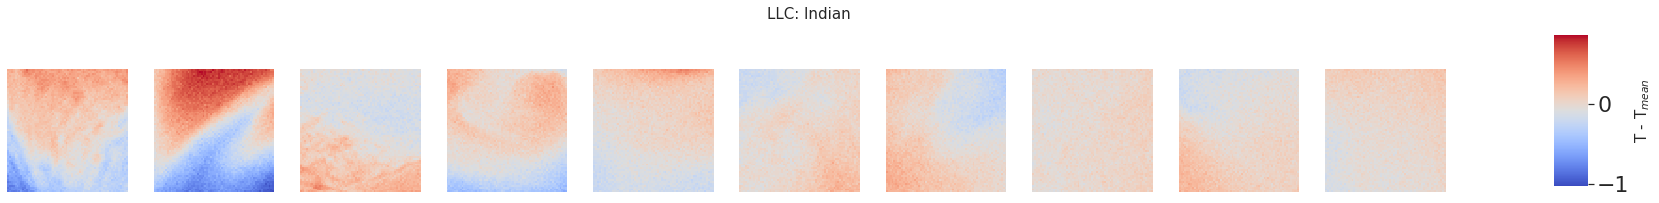

In [44]:
tmin=True
tmax=True
title=True
# region
lrect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
ltbl = llc[ lrect ]

#vrect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
#vtbl = v98[ vrect ]

# divvy up cutouts into percentiles
l10, l20, l30, l40, l50, l60, l70, l80, l90, l100 = np.percentile(ltbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#v10, v20, v30, v40, v50, v60, v70, v80, v90, v100 = np.percentile(vtbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

lr10  = ltbl[ (ltbl.LL < l10 ) ]
lr20  = ltbl[ (ltbl.LL > l10 ) & (ltbl.LL < l20) ]
lr30  = ltbl[ (ltbl.LL > l20 ) & (ltbl.LL < l30) ]
lr40  = ltbl[ (ltbl.LL > l30 ) & (ltbl.LL < l40) ]
lr50  = ltbl[ (ltbl.LL > l40 ) & (ltbl.LL < l50) ]
lr60  = ltbl[ (ltbl.LL > l50 ) & (ltbl.LL < l60) ]
lr70  = ltbl[ (ltbl.LL > l60 ) & (ltbl.LL < l70) ]
lr80  = ltbl[ (ltbl.LL > l70 ) & (ltbl.LL < l80) ]
lr90  = ltbl[ (ltbl.LL > l80 ) & (ltbl.LL < l90) ]
lr100 = ltbl[ (ltbl.LL > l90 ) & (ltbl.LL < l100) ]

llc_rs = [lr10, lr20, lr30, lr40, lr50, lr60, lr70, lr80, lr90, lr100]

#vr10  = vtbl[ (vtbl.LL < v10 ) ]
#vr20  = vtbl[ (vtbl.LL > v10 ) & (vtbl.LL < v20) ]
#vr30  = vtbl[ (vtbl.LL > v20 ) & (vtbl.LL < v30) ]
#vr40  = vtbl[ (vtbl.LL > v30 ) & (vtbl.LL < v40) ]
#vr50  = vtbl[ (vtbl.LL > v40 ) & (vtbl.LL < v50) ]
#vr60  = vtbl[ (vtbl.LL > v50 ) & (vtbl.LL < v60) ]
#vr70  = vtbl[ (vtbl.LL > v60 ) & (vtbl.LL < v70) ]
#vr80  = vtbl[ (vtbl.LL > v70 ) & (vtbl.LL < v80) ]
#vr90  = vtbl[ (vtbl.LL > v80 ) & (vtbl.LL < v90) ]
#vr100 = vtbl[ (vtbl.LL > v90 ) & (vtbl.LL < v100) ]

#v98_rs = [vr10, vr20, vr30, vr40, vr50, vr60, vr70, vr80, vr90, vr100]

# pick 1 cutout from each percentile region
limgs = []
#vimgs = []

for reg in llc_rs: 
    img = np.random.choice( reg.index.to_numpy(), size = 1)
    limgs.append(img[0])
    
#for reg in v98_rs:
#    img = np.random.choice( reg.index.to_numpy(), size = 1)
#    vimgs.append(img[0])
    
#create figure

fig, axes = plt.subplots(1, 10, figsize = (23,3) )

fig.suptitle( 'LLC: Indian', fontsize=15)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_kws={"orientation": "vertical", "shrink":1, "aspect":40, "label": "T - T$_{mean}$"}
pal, cm = plotting.load_palette()

#determine tmax and tmin
imgs = np.empty((64,64,10))
LLs  = np.empty(10)

for i in range(0,10):
    lidx = limgs[ i ]
    #vidx = vimgs[ i ]
    
    lcutout = llc.iloc[ lidx ] 
    #vcutout = v98.iloc[ vidx ] 
    
    limg= llc_io.grab_image(lcutout)
    #vimg= llc_io.grab_image(vcutout)
    
    imgs[:,:,i] = limg
    #imgs[:,:,10 + i] = limg
    LLs[i] = lcutout.LL
    #LLs[10 + i] = lcutout.LL

if tmax==True: 
    tmax = np.max(imgs)

if tmin==True:
    tmin = np.min(imgs)
print('Temperature scale is {} to {}.'.format(tmin, tmax))

# plot

for i, ax in enumerate(axes.flat):
    img = imgs[:,:,i]
    sns.heatmap(ax=ax, data=img, xticklabels=[], yticklabels=[], cmap='coolwarm',
            cbar=i == 0,
            vmin=tmin, vmax=tmax,
            cbar_ax=None if i else cbar_ax,
            cbar_kws=None if i else cbar_kws)
    #ax.set_title('LL = {}'.format(round(LLs[i])))
    ax.figure.axes[-1].yaxis.label.set_size(15)

fig.tight_layout(rect=[0, 0, .9, 1])

Temperature scale is -1.5948143005371094 to 2.292835235595703.


/tmp/ipykernel_11590/889614196.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


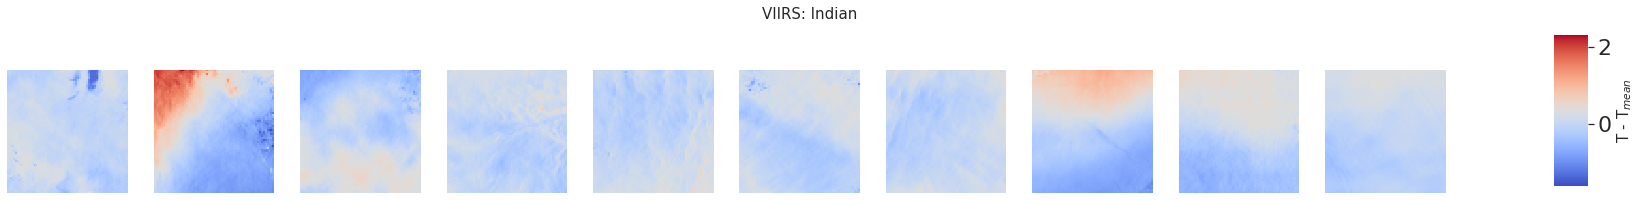

In [43]:
tmin=True
tmax=True
title=True
# region
#lrect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
#ltbl = llc[ lrect ]

vrect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
vtbl = v98[ vrect ]

# divvy up cutouts into percentiles
#l10, l20, l30, l40, l50, l60, l70, l80, l90, l100 = np.percentile(ltbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
v10, v20, v30, v40, v50, v60, v70, v80, v90, v100 = np.percentile(vtbl.LL.to_numpy(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

#lr10  = ltbl[ (ltbl.LL < l10 ) ]
#lr20  = ltbl[ (ltbl.LL > l10 ) & (ltbl.LL < l20) ]
#lr30  = ltbl[ (ltbl.LL > l20 ) & (ltbl.LL < l30) ]
#lr40  = ltbl[ (ltbl.LL > l30 ) & (ltbl.LL < l40) ]
#lr50  = ltbl[ (ltbl.LL > l40 ) & (ltbl.LL < l50) ]
#lr60  = ltbl[ (ltbl.LL > l50 ) & (ltbl.LL < l60) ]
#lr70  = ltbl[ (ltbl.LL > l60 ) & (ltbl.LL < l70) ]
#lr80  = ltbl[ (ltbl.LL > l70 ) & (ltbl.LL < l80) ]
#lr90  = ltbl[ (ltbl.LL > l80 ) & (ltbl.LL < l90) ]
#lr100 = ltbl[ (ltbl.LL > l90 ) & (ltbl.LL < l100) ]

#llc_rs = [lr10, lr20, lr30, lr40, lr50, lr60, lr70, lr80, lr90, lr100]

vr10  = vtbl[ (vtbl.LL < v10 ) ]
vr20  = vtbl[ (vtbl.LL > v10 ) & (vtbl.LL < v20) ]
vr30  = vtbl[ (vtbl.LL > v20 ) & (vtbl.LL < v30) ]
vr40  = vtbl[ (vtbl.LL > v30 ) & (vtbl.LL < v40) ]
vr50  = vtbl[ (vtbl.LL > v40 ) & (vtbl.LL < v50) ]
vr60  = vtbl[ (vtbl.LL > v50 ) & (vtbl.LL < v60) ]
vr70  = vtbl[ (vtbl.LL > v60 ) & (vtbl.LL < v70) ]
vr80  = vtbl[ (vtbl.LL > v70 ) & (vtbl.LL < v80) ]
vr90  = vtbl[ (vtbl.LL > v80 ) & (vtbl.LL < v90) ]
vr100 = vtbl[ (vtbl.LL > v90 ) & (vtbl.LL < v100) ]

v98_rs = [vr10, vr20, vr30, vr40, vr50, vr60, vr70, vr80, vr90, vr100]

# pick 1 cutout from each percentile region
#limgs = []
vimgs = []

#for reg in llc_rs: 
#    img = np.random.choice( reg.index.to_numpy(), size = 1)
#    limgs.append(img[0])
    
for reg in v98_rs:
    img = np.random.choice( reg.index.to_numpy(), size = 1)
    vimgs.append(img[0])
    
#create figure

fig, axes = plt.subplots(1, 10, figsize = (23,3) )

fig.suptitle( 'VIIRS: Indian', fontsize=15)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_kws={"orientation": "vertical", "shrink":1, "aspect":40, "label": "T - T$_{mean}$"}
pal, cm = plotting.load_palette()

#determine tmax and tmin
imgs = np.empty((64,64,10))
LLs  = np.empty(10)

for i in range(0,10):
    #lidx = limgs[ i ]
    vidx = vimgs[ i ]
    
    #lcutout = llc.iloc[ lidx ] 
    vcutout = v98.iloc[ vidx ] 
    
    #limg= llc_io.grab_image(lcutout)
    vimg= llc_io.grab_image(vcutout)
    
    imgs[:,:,i] = vimg
    #imgs[:,:,10 + i] = limg
    LLs[i] = vcutout.LL
    #LLs[10 + i] = lcutout.LL

if tmax==True: 
    tmax = np.max(imgs)

if tmin==True:
    tmin = np.min(imgs)
print('Temperature scale is {} to {}.'.format(tmin, tmax))

# plot

for i, ax in enumerate(axes.flat):
    img = imgs[:,:,i]
    sns.heatmap(ax=ax, data=img, xticklabels=[], yticklabels=[], cmap='coolwarm',
            cbar=i == 0,
            vmin=tmin, vmax=tmax,
            cbar_ax=None if i else cbar_ax,
            cbar_kws=None if i else cbar_kws)
    #ax.set_title('LL = {}'.format(round(LLs[i])))
    ax.figure.axes[-1].yaxis.label.set_size(15)

fig.tight_layout(rect=[0, 0, .9, 1])

In [ ]:
print('Conclusion: n